In [1007]:
# logistic regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/logistic_reg.csv')
data[:3]

,x1,x2,y
0,3.745401,9.695846,1.0
1,9.507143,7.751328,1.0
2,7.319939,9.394989,1.0


In [1008]:
# create input matrix
x0 = np.ones((data.shape[0], 1))
x1 = data['x1'].values.reshape((-1, 1))
x2 = data['x2'].values.reshape((-1, 1))
X = np.concatenate((x0, x1, x2), axis=1)
X.shape

(50, 3)

In [1009]:
# create target vector
y = data['y'].values.reshape((data.shape[0], 1))
y.shape

(50, 1)

In [1010]:
# create theta vector
theta = np.zeros((X.shape[1], 1))
theta.shape

(3, 1)

In [1011]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost_function(h, y):
    return np.sum(-y*np.log(h) - (1-y)*np.log(1-h))

In [1012]:
a = 0.1  # learning rate
m = X.shape[0]  # number of training examples
iterations = range(100000)  # number of iterations
loss_list = []  # list of loss values

In [1013]:
# gradient descent algorithm

for i in iterations:
    h = sigmoid(X @ theta)  # hypothesis
    
    # (h - y) are the errors
    # X.T @ (h - y) sums the errors for each theta
    # (a / m) is learning rate (slow down the process)
    theta = theta - (a / m) * X.T @ (h - y)

    loss = cost_function(h, y)
    loss_list.append(loss)

theta

array([[-34.51353345],
       [  3.60043571],
       [  3.41679535]])

In [1014]:
# print equation of the decision boundary
print('0 = %.2f + %.2fx + %.2fy' % (theta[0], theta[1], theta[2]))

0 = -34.51 + 3.60x + 3.42y


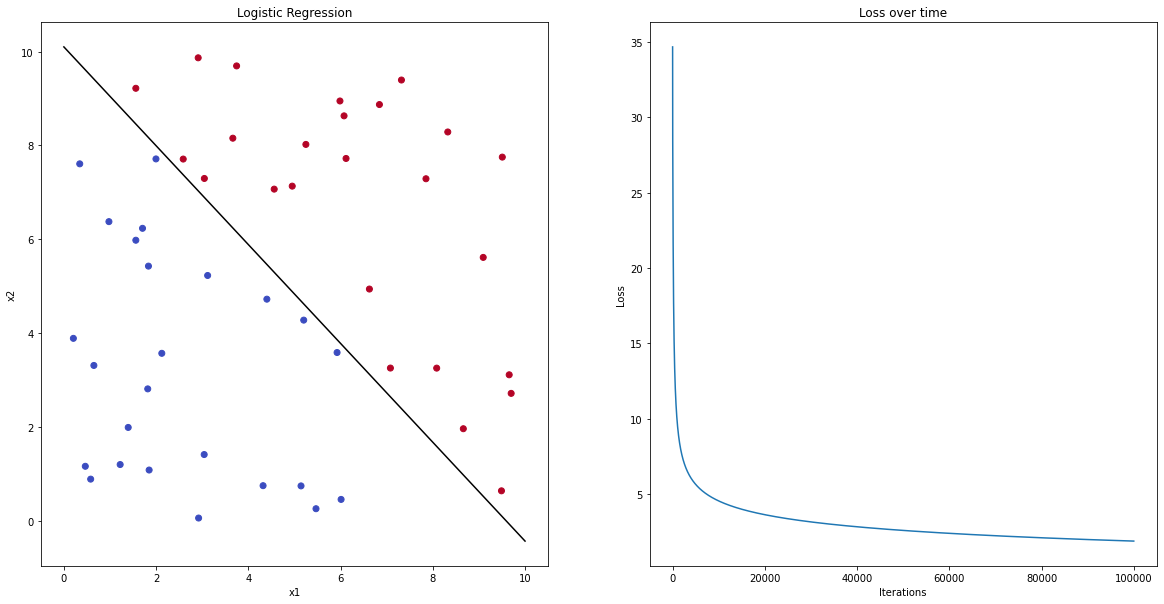

In [1015]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
ax1.set_title('Logistic Regression')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

# plot the data points
ax1.scatter(data['x1'], data['x2'], c=data['y'], cmap='coolwarm')

# plot the decision boundary
x1 = np.linspace(0, 10, 100)
x2 = -(theta.T[0][0] + theta.T[0][1]*x1)/theta.T[0][2]
ax1.plot(x1, x2, 'k')

# plot how the loss decreases over time
ax2 = fig.add_subplot(122)
ax2.set_title('Loss over time')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Loss')
ax2.plot(iterations, loss_list)

plt.show()